In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
id2coord = dict(zip(train_data['ID'], list(zip(train_data['LAT'], train_data['LON']))))
id2coord, len(id2coord)

({'PD01': (45.60158469, 11.90355081),
  'PD04': (45.37100479, 11.84082978),
  'RO01': (45.04582512, 12.06086934),
  'RO02': (45.10407489, 11.55324086),
  'RO03': (45.03875842, 11.79015164),
  'TV01': (45.88973369, 12.30712448),
  'TV02': (45.67172072, 12.23780698),
  'VE01': (45.6290925, 12.59068235),
  'VE02': (45.49961805, 12.26124917),
  'VE03': (45.42842368, 12.3129303),
  'VI02': (45.75927327, 11.73585212),
  'VI03': (45.7135591, 11.3676575),
  'VI04': (45.55956112, 11.53865377),
  'VR02': (45.18262647, 11.31051146),
  'VR04': (45.43340536, 11.03056877),
  'X10019': (45.69042908, 9.484260928),
  'X10038': (45.61924378, 8.756970445),
  'X10079': (45.41277169, 10.68335734),
  'X10097': (45.04650154, 11.18093582),
  'X10167': (45.01687782, 11.07609463),
  'X10279': (45.47899606, 9.235491038),
  'X10326': (45.28193561, 8.754334595),
  'X10331': (45.30360787, 8.84480461),
  'X10452': (45.3027835, 9.495273697),
  'X10458': (45.23349364, 9.666250375),
  'X10507': (45.64970251, 9.60122333

In [68]:
train_data

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.000
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.000
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.000
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.000
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86579,ID_NCWXIY,31-12-21,X9897,45.498227,9.556232,0.000000,NaN,-0.434350,0.250490,0.000032,0.000643,NaN,13063.79770,39.750
86580,ID_UDQIEE,31-12-21,X9928,45.142541,10.043836,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.125
86581,ID_ENDUPX,31-12-21,X9969,45.842207,9.351658,0.000000,284.98,-0.157753,0.000000,0.000031,0.000153,0.000122,13050.16499,28.325
86582,ID_3ZBA6C,31-12-21,X9993,45.113503,8.874065,0.000000,NaN,-0.798636,0.399524,0.000031,0.000717,NaN,13061.41329,21.250


In [38]:
print(f"Train size before dropping empty GT NO2: {len(train_data)}")

train_data.dropna(subset = ['GT_NO2'], inplace=True)
print(f"Train size after dropping empty GT NO2: {len(train_data)}")

Train size before dropping empty GT NO2: 82051
Train size after dropping empty GT NO2: 82051


In [41]:
grouped_by_date = pd.DataFrame(train_data.groupby('Date')['GT_NO2'].mean()).reset_index()

In [44]:
# First, try to convert using the first known format
grouped_by_date['Date'] = pd.to_datetime(grouped_by_date['Date'], errors='raise', dayfirst=True)

grouped_by_date = grouped_by_date.sort_values(['Date'])

In [45]:
grouped_by_date.head()

,Date,GT_NO2
0,2019-01-01,34.922000
396,2019-01-02,24.864202
790,2019-01-03,44.280444
880,2019-01-04,53.422078
916,2019-01-05,58.038816


/Users/gaurxvreddy/CSCI566/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:36:05 - cmdstanpy - INFO - Chain [1] start processing
14:36:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 3.4856851473275134
Root Mean Squared Error (RMSE): 4.822641400998155


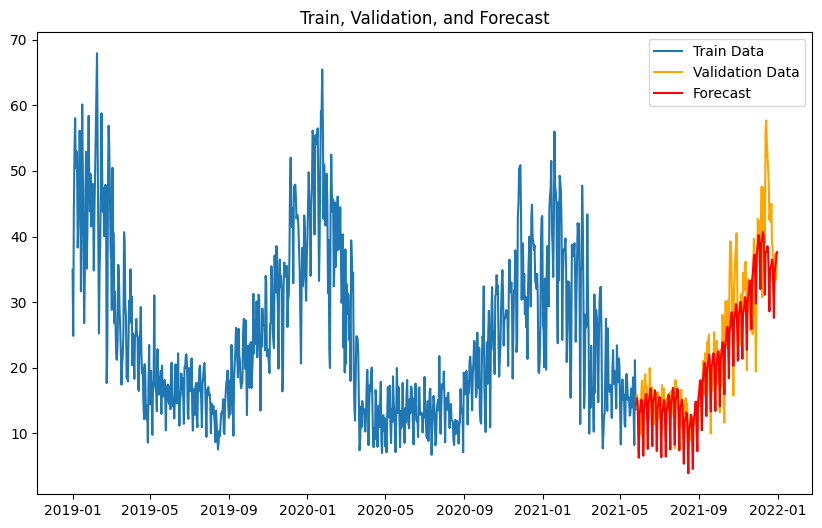

In [46]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.DataFrame({'ds': grouped_by_date.Date, 'y': grouped_by_date['GT_NO2'].values})

split_index = int(len(df) * 0.8)
train_data = df.iloc[:split_index]
val_data = df.iloc[split_index:]

model = Prophet()
model.fit(train_data)

# 4. Make predictions for the validation period
# Create future dataframe that includes the validation period
future = model.make_future_dataframe(periods=len(val_data), freq='D')
forecast = model.predict(future)

# Extract predictions for the validation set
val_forecast = forecast[['ds', 'yhat']].iloc[split_index:]

# 5. Evaluate model performance
# Calculate metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(val_data['y'], val_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(val_data['y'], val_forecast['yhat']))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 6. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data')
plt.plot(val_data['ds'], val_data['y'], label='Validation Data', color='orange')
plt.plot(val_forecast['ds'], val_forecast['yhat'], label='Forecast', color='red')
plt.title('Train, Validation, and Forecast')
plt.legend()
plt.show()

In [47]:
grouped_by_date

,Date,GT_NO2
0,2019-01-01,34.922000
396,2019-01-02,24.864202
790,2019-01-03,44.280444
880,2019-01-04,53.422078
916,2019-01-05,58.038816
...,...,...
719,2021-12-27,36.854008
755,2021-12-28,37.318269
789,2021-12-29,33.401371
858,2021-12-30,35.866456


In [54]:
train_data = pd.read_csv("data/train.csv")
train_data.ID.unique(), test_data.ID.unique()

(array(['PD01', 'PD04', 'RO01', 'RO02', 'RO03', 'TV01', 'TV02', 'VE01',
        'VE02', 'VE03', 'VI02', 'VI03', 'VI04', 'VR02', 'VR04', 'X10019',
        'X10038', 'X10079', 'X10097', 'X10167', 'X10279', 'X10326',
        'X10331', 'X10452', 'X10458', 'X10507', 'X12017', 'X17286',
        'X20034', 'X20491', 'X20495', 'X30163', 'X5504', 'X5507', 'X5517',
        'X5520', 'X5531', 'X5532', 'X5534', 'X5542', 'X5545', 'X5547',
        'X5548', 'X5549', 'X5554', 'X5557', 'X5568', 'X5579', 'X5586',
        'X5587', 'X5591', 'X5595', 'X5598', 'X5599', 'X5601', 'X5603',
        'X5607', 'X5609', 'X5610', 'X5611', 'X5950', 'X5958', 'X5965',
        'X6685', 'X6781', 'X6813', 'X6826', 'X6859', 'X6871', 'X6880',
        'X9802', 'X9852', 'X9857', 'X9877', 'X9897', 'X9928', 'X9969',
        'X9993', 'X9999'], dtype=object),
 array(['PD03', 'TV03', 'X5561', 'X5953', 'X6701', 'X6877'], dtype=object))

In [66]:
train_max_date = grouped_by_date.Date.max()
train_min_date = grouped_by_date.Date.min()

test_dates = pd.to_datetime(test_data['Date'], errors='raise', dayfirst=True)

/var/folders/_j/84scrmf1021crzjg0bkcrtvh0000gn/T/ipykernel_11930/1007214052.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_dates = pd.to_datetime(test_data['Date'], errors='raise', dayfirst=True)


True

In [67]:
test_data

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure
0,ID_2MYNQS,1/1/19,PD03,45.289376,11.642394,3.277529,NaN,-0.313361,0.771456,0.000024,0.000075,NaN,14440.02819
1,ID_P4U5WU,1/1/19,TV03,45.836941,12.510362,0.000000,NaN,-0.229512,0.398208,0.000023,0.000120,NaN,14434.04790
2,ID_U4KWPK,1/1/19,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,0.000171,0.000148,14427.42478
3,ID_QGSNTZ,1/1/19,X5953,45.131947,10.015742,1.928031,NaN,0.132952,0.756917,0.000024,0.000266,NaN,14443.09006
4,ID_GHSZ6K,1/1/19,X6701,45.186329,9.146666,0.000000,NaN,-0.198272,0.678858,0.000023,0.000149,NaN,14440.85840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,ID_GUSXU9,12/31/21,TV03,45.836941,12.510362,0.000000,282.58,-0.013364,0.000000,0.000032,0.000135,0.000103,13060.46860
6572,ID_GMVEG1,12/31/21,X5561,45.582894,8.842165,0.000000,285.12,-0.412887,0.002098,0.000031,0.000201,0.000171,13056.11764
6573,ID_GD6HNP,12/31/21,X5953,45.131947,10.015742,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,ID_J7YW1Y,12/31/21,X6701,45.186329,9.146666,0.000000,NaN,-1.025128,0.476947,0.000031,0.000751,NaN,13063.22260
